<a href="https://colab.research.google.com/github/kr19al0711/ds-cs982-student-success/blob/develop/StudentSuccessEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes
- **Problem Statment**: Predict student success in an undergraduate degreee considering demographic and socio-economics factors. Features also includes academic history prior to registration

- **Classification**: Graduated and Dropout, each column represents a student

- **Data Cleanup Notes**:
  - There were no null values in the dataset
  - Features that describe the academic and performance details of the student are dropped
  - We will drop rows for students who have a label enrolled


# Importing libraries and data

In [5]:
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [67]:
data = pd.read_csv("https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip",sep=";")
data.head()
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [69]:
data.groupby("Target")["Target"].count()

,Target
Target,
Dropout,1421
Enrolled,794
Graduate,2209


In [70]:
#Descriptive statistics of the dataset
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# Exploring Data


## Data Cleaning

In [83]:
#Removing \t from "Daytime/evening attendance\t" column
data.rename(columns = {"Daytime/evening attendance\t":"Daytime/evening attendance"},inplace=True)

In [84]:
# Demographic Data
demographic_data = [
    'Marital status',
    'Nacionality',
    'Gender',
    'Age at enrollment',
    'International',
    'Educational special needs'
]

# Socio-Economic Data
socio_economic_data = [
    'Mother’s qualification',
    'Father’s qualification',
    'Mother’s occupation',
    'Father’s occupation',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Scholarship holder',
    'Displaced',
    'Debtor'
]

# Academic Data
academic_data = [
    'Application order',
    'Course',
    'Previous qualification',
    'Previous qualification (grade)',
    'Admission grade'
]

# Academic Data to be dropped. Justify!!!!
academic_data_dropped=[
    'Tuition fees up to date',
    'Application mode',
    'Daytime/evening attendance',
]

# Performance Data
performance_data = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

drop_features = academic_data_dropped + performance_data

target = ["Target"]

len(demographic_data+socio_economic_data+academic_data+target)



22

### Observations dropped

In [85]:
# Dropping rows for Enrolled students
student_success = data[data["Target"] != "Enrolled"]

### Features dropped

In [90]:
# Dropping student curricullum features
student_success.drop(columns=drop_features,inplace=True)

<ipython-input-90-f6fdd41fe045>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_success.drop(columns=drop_features,inplace=True)


## Descriptive Analysis

In [93]:
student_success.head()

,Marital status,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,5,171,1,122.0,1,19,12,5,9,...,0,0,1,0,20,0,10.8,1.4,1.74,Dropout
1,1,1,9254,1,160.0,1,1,3,3,3,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,1,5,9070,1,122.0,1,37,37,9,9,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,1,2,9773,1,122.0,1,38,37,5,3,...,0,0,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,2,1,8014,1,100.0,1,37,38,9,9,...,0,0,0,0,45,0,13.9,-0.3,0.79,Graduate


In [91]:
student_success.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  3630 non-null   int64  
 1   Application order               3630 non-null   int64  
 2   Course                          3630 non-null   int64  
 3   Previous qualification          3630 non-null   int64  
 4   Previous qualification (grade)  3630 non-null   float64
 5   Nacionality                     3630 non-null   int64  
 6   Mother's qualification          3630 non-null   int64  
 7   Father's qualification          3630 non-null   int64  
 8   Mother's occupation             3630 non-null   int64  
 9   Father's occupation             3630 non-null   int64  
 10  Admission grade                 3630 non-null   float64
 11  Displaced                       3630 non-null   int64  
 12  Educational special needs       3630 no

In [92]:
student_success.shape

(3630, 22)

### Distribution of Students by Age


In [54]:
student_success["Age at enrollment"].describe()

,Age at enrollment
count,3630.000000
mean,23.461157
std,7.827994
min,17.000000
25%,19.000000
50%,20.000000
75%,25.000000
max,70.000000


<Axes: xlabel='Age at enrollment', ylabel='Count'>

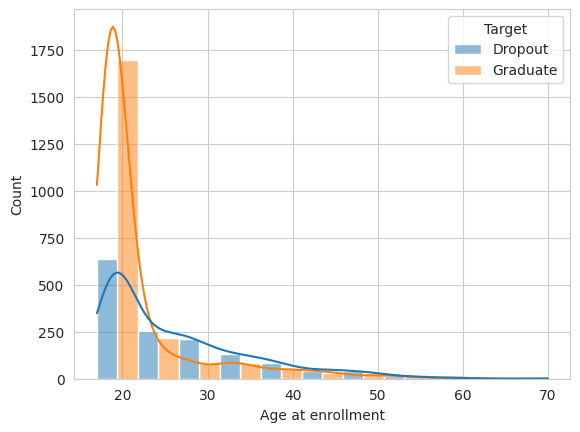

In [133]:
sns.set_style("whitegrid")
sns.histplot(data=student_success,x="Age at enrollment",hue="Target",kde=True,binwidth=5,multiple="dodge")

In [36]:
# sns.scatterplot(data=data,x=data["Age at enrollment"],y="Target",hue="Target")

### Distribution of Students by Gender

In [121]:
gender_statistics = student_success[["Gender","Target"]]
gender_statistics["Gender Category"] = gender_statistics["Gender"].apply(lambda x : "Female" if x == 0 else "Male")
gender_statistics["Gender Category"].astype("category")
gender_statistics.head()


<ipython-input-121-632dbdd90a09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_statistics["Gender Category"] = gender_statistics["Gender"].apply(lambda x : "Female" if x == 0 else "Male")


,Gender,Target,Gender Category
0,1,Dropout,Male
1,1,Graduate,Male
2,1,Dropout,Male
3,0,Graduate,Female
4,0,Graduate,Female


<Axes: xlabel='Target', ylabel='Count'>

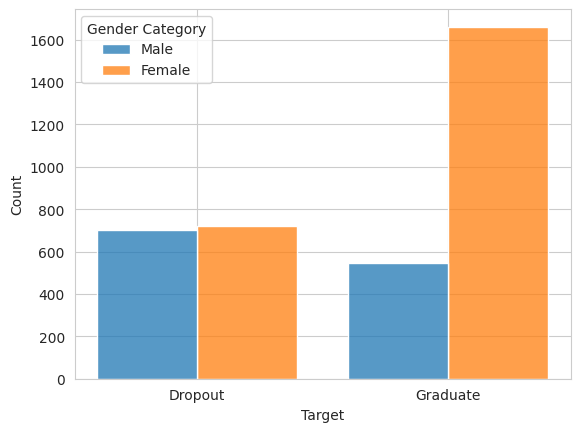

In [132]:
sns.set_style("whitegrid")
sns.histplot(data=gender_statistics,x="Target",hue="Gender Category",multiple="dodge",shrink=.8,)